## Download data and change format for easy to read in dataframe

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',500)
tuples = []
i=0
for t in open('Final-player.txt'):
    i=i+1
    if i == 2580:
        tuples.append(eval(t[1:-1]))
    else:
        tuples.append(eval(t[1:-2]))
df = pd.DataFrame(tuples)
df.columns = ["id", "name", "club","club_value","birth","weight","height","country","role","foot","transfers","injuries"]
number_of_players = df.shape[0]
df.head(5)

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injuries
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","[(16/17, Meniscal Injury, 29)]"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","[(18/19, Achilles tendon rupture, 314), (16/17..."
2,371021,Arijanet Murić,Manchester City,"1,14 Bill. €",1998-11-07,-,"1,98",Kosovo,Goalkeeper,right,"[(\nNAC Breda , \nMan City , 18/19, Aug 22, 20...",[]
3,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69,"1,88",England,Defender - Centre-Back,right,"[(\nEverton , \nMan City , 16/17, Aug 9, 2016)...","[(18/19, Muscle Injury, 6), (17/18, Minor Knoc..."
4,176553,Aymeric Laporte,Manchester City,"1,14 Bill. €",1994-05-27,85,"1,91",France,Defender - Centre-Back,left,"[(\nAthletic , \nMan City , 17/18, Jan 30, 201...","[(18/19, Muscle Injury, 12), (16/17, Groin Inj..."


## Cleasing data by replace null value and change datatype in some columns.

In [52]:
df.isnull().sum()

id             0
name           0
club           0
club_value     0
birth         59
weight         0
height        59
country       59
role          59
foot          59
transfers      0
injuries       0
dtype: int64

In [53]:
df = df[df['birth'].notnull()]
df = df[df['weight'] != '-']
df['height'] = df['height'].str.replace(",", "")

In [54]:
import datetime
df['weight'] = df['weight'].astype('int64')
df['height'] = df['height'].astype('int64')
df['birth'] = pd.to_datetime(df['birth'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2362 non-null   object        
 1   name        2362 non-null   object        
 2   club        2362 non-null   object        
 3   club_value  2362 non-null   object        
 4   birth       2362 non-null   datetime64[ns]
 5   weight      2362 non-null   int64         
 6   height      2362 non-null   int64         
 7   country     2362 non-null   object        
 8   role        2362 non-null   object        
 9   foot        2362 non-null   object        
 10  transfers   2362 non-null   object        
 11  injuries    2362 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 239.9+ KB


## Separate injury in each time in injurie column. 

In [55]:
s = df.apply(lambda x: pd.Series(x[11]),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'injurie'
df = df.drop(['injuries'], axis=1).join(s)
df.reset_index()
df.head()

C:\Users\Nattawut\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injurie
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,188,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","(16/17, Meniscal Injury, 29)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(18/19, Achilles tendon rupture, 314)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(16/17, Disrupted Calf Muscle, 57)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Calf Injury, 17)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Torn muscle bundle, 24)"


## Check number of injury in each player in injurie_y column.

In [56]:
df = df[df['injurie'] == df['injurie'] ]
df2 = df.groupby(['name'],as_index = False).agg({'injurie':'count'}).sort_values('injurie',ascending = False)
df3 = pd.merge(df,df2,on='name',how='right')
df3

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injurie_x,injurie_y
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,188,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","(16/17, Meniscal Injury, 29)",1
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(18/19, Achilles tendon rupture, 314)",7
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(16/17, Disrupted Calf Muscle, 57)",7
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Calf Injury, 17)",7
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,184,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Torn muscle bundle, 24)",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,256680,Juanpi Añor,SD Huesca,"46,80 Mill. €",1994-01-24,65,175,Venezuela,Forward - Right Winger,left,"[(\nMálaga CF , \nSD Huesca , 18/19, Jan 31, 2...","(15/16, Infection, 7)",6
12242,256680,Juanpi Añor,SD Huesca,"46,80 Mill. €",1994-01-24,65,175,Venezuela,Forward - Right Winger,left,"[(\nMálaga CF , \nSD Huesca , 18/19, Jan 31, 2...","(14/15, Unknown Injury, 12)",6
12243,459463,Cucho Hernández,SD Huesca,"46,80 Mill. €",1999-04-22,73,176,Colombia,Forward - Centre-Forward,right,"[(\nWatford , \nSD Huesca , 17/18, Jul 8, 2017...","(18/19, Flu, 7)",3
12244,459463,Cucho Hernández,SD Huesca,"46,80 Mill. €",1999-04-22,73,176,Colombia,Forward - Centre-Forward,right,"[(\nWatford , \nSD Huesca , 17/18, Jul 8, 2017...","(17/18, Metatarsal Fracture, 47)",3


## Time to recovery in column2.

In [57]:
df_injurie = pd.DataFrame(df3['injurie_x'].tolist(), index=df3.index)
df_injurie

,0,1,2
0,16/17,Meniscal Injury,29
1,18/19,Achilles tendon rupture,314
2,16/17,Disrupted Calf Muscle,57
3,15/16,Calf Injury,17
4,15/16,Torn muscle bundle,24
...,...,...,...
12241,15/16,Infection,7
12242,14/15,Unknown Injury,12
12243,18/19,Flu,7
12244,17/18,Metatarsal Fracture,47


## Join to main table/change datatype again

In [58]:
df3 = df3.drop('injurie_x', axis=1).join(df_injurie)

In [59]:
df3 = df3.rename(index=str, columns={0: "season", 1: "type" , 2 : "days"})
df3.season = df3.season.apply(lambda x : '20' + x[3:] + '-01-01')

In [60]:
import datetime
df3['season'] = pd.to_datetime(df3['season'], format='%Y-%m-%d')
df3['season'] = df3['season'].dt.strftime('%Y-%m-%d')
df3['birth'] = df3['birth'].dt.strftime('%Y-%m-%d')

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12246 entries, 0 to 12245
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12246 non-null  object
 1   name        12246 non-null  object
 2   club        12246 non-null  object
 3   club_value  12246 non-null  object
 4   birth       12246 non-null  object
 5   weight      12246 non-null  int64 
 6   height      12246 non-null  int64 
 7   country     12246 non-null  object
 8   role        12246 non-null  object
 9   foot        12246 non-null  object
 10  transfers   12246 non-null  object
 11  injurie_y   12246 non-null  int64 
 12  season      12246 non-null  object
 13  type        12246 non-null  object
 14  days        12246 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.5+ MB


## defind function to seach age when player get injury

In [62]:
def injurie_age(season,birth):
    return datetime.datetime.strptime(season, '%Y-%m-%d').year - datetime.datetime.strptime(birth, '%Y-%m-%d').year

In [63]:
df3['age'] = df3.apply(lambda x : injurie_age(x['season'], x['birth']), axis=1)

## Check number of all injury

In [64]:
df3['transaction_injurie'] =df3['season']+' '+df3['type']
df3.shape

(12246, 17)

## Table that in clude each injury and time to recovory in each injury

In [65]:
gg = df3\
        .groupby(['name','season','transaction_injurie'], as_index = False)\
        .agg({'days':sum})\
        .set_index('transaction_injurie')
gg.head()

,name,season,days
transaction_injurie,,,
2017-01-01 Groin Strain,Aaron Cresswell,2017-01-01,11
2017-01-01 Knee Injury,Aaron Cresswell,2017-01-01,84
2009-01-01 Medial Collateral Ligament Tear,Aaron Lennon,2009-01-01,9
2010-01-01 groin strain,Aaron Lennon,2010-01-01,59
2013-01-01 Knee Injury,Aaron Lennon,2013-01-01,17


## Cleaning data annd change data of column 'days' to calculate

In [66]:
gg['days'] = gg['days'].replace('?','7')
gg['days'] = gg['days'].astype('int64')

In [67]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11426 entries, 2017-01-01 Groin Strain to 2019-01-01 Torn Muscle Fibre
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11426 non-null  object
 1   season  11426 non-null  object
 2   days    11426 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 357.1+ KB


## Select the most severe injury based on time to recovery in each player.

In [68]:
severe_injurie =  gg.groupby(['name'], as_index = False)\
                    .agg({'days':'idxmax'}).rename(columns={'days':'transaction_injurie'})
severe_injurie['maxinjurie'] = 1
severe_injurie

,name,transaction_injurie,maxinjurie
0,Aaron Cresswell,2017-01-01 Knee Injury,1
1,Aaron Lennon,2010-01-01 groin strain,1
2,Aaron Leya Iseka,2016-01-01 Cruciate Ligament Rupture,1
3,Aaron Mooy,2012-01-01 Back trouble,1
4,Aaron Ramsey,2015-01-01 Hamstring Injury,1
...,...,...,...
1974,Óscar Duarte,2017-01-01 Cruciate Ligament Rupture,1
1975,Óscar Plano,2019-01-01 Shoulder Injury,1
1976,Óscar Trejo,2017-01-01 Appendectomy,1
1977,Óscar de Marcos,2018-01-01 Sprained ankle,1


In [69]:
order_injuries = df3[['name','transaction_injurie', 'season']]\
                .drop_duplicates()\
                .sort_values(by=['name','season'])
order_injuries.head()

,name,transaction_injurie,season
1186,Aaron Cresswell,2017-01-01 Groin Strain,2017-01-01
1187,Aaron Cresswell,2017-01-01 Knee Injury,2017-01-01
2079,Aaron Lennon,2009-01-01 Medial Collateral Ligament Tear,2009-01-01
2078,Aaron Lennon,2010-01-01 groin strain,2010-01-01
2077,Aaron Lennon,2013-01-01 Knee Injury,2013-01-01


## Group order injury to find position of severest injury and next injury from that 

In [70]:
orderRecord_1 = order_injuries.merge(severe_injurie, on=['name','transaction_injurie'], how = 'left')
orderRecord_1['Next1'] = orderRecord_1.groupby('name')['maxinjurie'].shift(1)
orderRecord_1 = orderRecord_1.fillna(0)
orderRecord_1

,name,transaction_injurie,season,maxinjurie,Next1
0,Aaron Cresswell,2017-01-01 Groin Strain,2017-01-01,0.0,0.0
1,Aaron Cresswell,2017-01-01 Knee Injury,2017-01-01,1.0,0.0
2,Aaron Lennon,2009-01-01 Medial Collateral Ligament Tear,2009-01-01,0.0,0.0
3,Aaron Lennon,2010-01-01 groin strain,2010-01-01,1.0,0.0
4,Aaron Lennon,2013-01-01 Knee Injury,2013-01-01,0.0,1.0
...,...,...,...,...,...
11421,Ömer Toprak,2018-01-01 Nasal Bone Fracture,2018-01-01,0.0,0.0
11422,Ömer Toprak,2019-01-01 Infection,2019-01-01,0.0,0.0
11423,Ömer Toprak,2019-01-01 Muscle fiber tear,2019-01-01,0.0,0.0
11424,Ömer Toprak,2019-01-01 Torn Muscle Fibre,2019-01-01,0.0,0.0


## Merge all columns that i calculate to main table and rename to eiei.

In [71]:
eiei = orderRecord_1.merge(df3, on=['name','transaction_injurie'], how='inner')
eiei = eiei.drop(eiei[(eiei.maxinjurie == 0.0) & (eiei.Next1 == 0.0)].index)
eiei['season_x'] = pd.to_datetime(eiei['season_x'], format='%Y-%m-%d')
eiei

,name,transaction_injurie,season_x,maxinjurie,Next1,id,club,club_value,birth,weight,height,country,role,foot,transfers,injurie_y,season_y,type,days,age
1,Aaron Cresswell,2017-01-01 Knee Injury,2017-01-01,1.0,0.0,92571,West Ham United,"323,00 Mill. €",1989-12-15,66,170,England,Defender - Left-Back,left,"[(\nIpswich , \nWest Ham , 14/15, Jul 3, 2014)...",2,2017-01-01,Knee Injury,84,28
3,Aaron Lennon,2010-01-01 groin strain,2010-01-01,1.0,0.0,14221,Burnley FC,"172,75 Mill. €",1987-04-16,62,165,England,Forward - Right Winger,right,"[(\nEverton , \nBurnley , 17/18, Jan 23, 2018)...",5,2010-01-01,groin strain,59,23
4,Aaron Lennon,2013-01-01 Knee Injury,2013-01-01,0.0,1.0,14221,Burnley FC,"172,75 Mill. €",1987-04-16,62,165,England,Forward - Right Winger,right,"[(\nEverton , \nBurnley , 17/18, Jan 23, 2018)...",5,2013-01-01,Knee Injury,17,26
7,Aaron Leya Iseka,2016-01-01 Cruciate Ligament Rupture,2016-01-01,1.0,0.0,289587,FC Toulouse,"72,45 Mill. €",1997-11-15,78,182,Belgium,Forward - Centre-Forward,right,"[(\nRSC Anderlecht , \nToulouse , 18/19, Jul 1...",1,2016-01-01,Cruciate Ligament Rupture,217,19
8,Aaron Mooy,2012-01-01 Back trouble,2012-01-01,1.0,0.0,123951,Huddersfield Town,"121,50 Mill. €",1990-09-15,80,179,Australia,Midfielder - Central Midfield,right,"[(\nMan City , \nHuddersfield , 17/18, Jul 1, ...",3,2012-01-01,Back trouble,136,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12215,Óscar Trejo,2017-01-01 Tear in the abductor muscle,2017-01-01,0.0,1.0,30321,Rayo Vallecano,"71,30 Mill. €",1988-04-26,79,180,Argentina,Midfielder - Attacking Midfield,right,"[(\nToulouse , \nRayo Vallecano , 17/18, Jul 1...",5,2017-01-01,Tear in the abductor muscle,6,29
12229,Óscar de Marcos,2018-01-01 Sprained ankle,2018-01-01,1.0,0.0,96718,Athletic Bilbao,"193,90 Mill. €",1989-04-14,76,182,Spain,Defender - Right-Back,right,"[(\nAlavés , \nAthletic , 09/10, Jul 1, 2010),...",12,2018-01-01,Sprained ankle,92,29
12230,Óscar de Marcos,2019-01-01 Muscular problems,2019-01-01,0.0,1.0,96718,Athletic Bilbao,"193,90 Mill. €",1989-04-14,76,182,Spain,Defender - Right-Back,right,"[(\nAlavés , \nAthletic , 09/10, Jul 1, 2010),...",12,2019-01-01,Muscular problems,7,30
12234,Ömer Toprak,2018-01-01 Thigh muscle rupture,2018-01-01,1.0,0.0,43512,Borussia Dortmund,"602,30 Mill. €",1989-07-21,81,187,Turkey,Defender - Centre-Back,right,"[(\nBay. Leverkusen , \nBor. Dortmund , 17/18,...",15,2018-01-01,Thigh muscle rupture,32,29


In [72]:
eiei['year_to_comback'] = 1
eiei['year_to_comback'] = np.where(eiei['Next1']==0.0, 0,(eiei['season_x'].diff()))
eiei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 1 to 12235
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   name                 3879 non-null   object         
 1   transaction_injurie  3879 non-null   object         
 2   season_x             3879 non-null   datetime64[ns] 
 3   maxinjurie           3879 non-null   float64        
 4   Next1                3879 non-null   float64        
 5   id                   3879 non-null   object         
 6   club                 3879 non-null   object         
 7   club_value           3879 non-null   object         
 8   birth                3879 non-null   object         
 9   weight               3879 non-null   int64          
 10  height               3879 non-null   int64          
 11  country              3879 non-null   object         
 12  role                 3879 non-null   object         
 13  foot             

## Calculate time when player return to injury again(in day unit but head of table is 'year_to comback' that is my fault)

In [73]:
eiei['year_to_comback'] = eiei['year_to_comback'].astype('timedelta64[D]')
eiei['year_to_comback'] = eiei['year_to_comback'].astype('int64')
eiei[['name','transaction_injurie','maxinjurie','Next1','year_to_comback']]

,name,transaction_injurie,maxinjurie,Next1,year_to_comback
1,Aaron Cresswell,2017-01-01 Knee Injury,1.0,0.0,0
3,Aaron Lennon,2010-01-01 groin strain,1.0,0.0,0
4,Aaron Lennon,2013-01-01 Knee Injury,0.0,1.0,1096
7,Aaron Leya Iseka,2016-01-01 Cruciate Ligament Rupture,1.0,0.0,0
8,Aaron Mooy,2012-01-01 Back trouble,1.0,0.0,0
...,...,...,...,...,...
12215,Óscar Trejo,2017-01-01 Tear in the abductor muscle,0.0,1.0,0
12229,Óscar de Marcos,2018-01-01 Sprained ankle,1.0,0.0,0
12230,Óscar de Marcos,2019-01-01 Muscular problems,0.0,1.0,365
12234,Ömer Toprak,2018-01-01 Thigh muscle rupture,1.0,0.0,0


## Drop duplicate and change day unit to year unit in year_to_comback column.

In [74]:
eiei = eiei.drop_duplicates(subset=['transaction_injurie'])

In [75]:
eiei['year_to_comback'] = eiei['year_to_comback'] //365

C:\Users\Nattawut\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
eiei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 1 to 12201
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 915 non-null    object        
 1   transaction_injurie  915 non-null    object        
 2   season_x             915 non-null    datetime64[ns]
 3   maxinjurie           915 non-null    float64       
 4   Next1                915 non-null    float64       
 5   id                   915 non-null    object        
 6   club                 915 non-null    object        
 7   club_value           915 non-null    object        
 8   birth                915 non-null    object        
 9   weight               915 non-null    int64         
 10  height               915 non-null    int64         
 11  country              915 non-null    object        
 12  role                 915 non-null    object        
 13  foot                 915 non-null

In [77]:
eiei.Next1 = eiei.Next1.astype('int64')
eiei.head(20)

C:\Users\Nattawut\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,transaction_injurie,season_x,maxinjurie,Next1,id,club,club_value,birth,weight,height,country,role,foot,transfers,injurie_y,season_y,type,days,age,year_to_comback
1,Aaron Cresswell,2017-01-01 Knee Injury,2017-01-01,1.0,0,92571,West Ham United,"323,00 Mill. €",1989-12-15,66,170,England,Defender - Left-Back,left,"[(\nIpswich , \nWest Ham , 14/15, Jul 3, 2014)...",2,2017-01-01,Knee Injury,84,28,0
3,Aaron Lennon,2010-01-01 groin strain,2010-01-01,1.0,0,14221,Burnley FC,"172,75 Mill. €",1987-04-16,62,165,England,Forward - Right Winger,right,"[(\nEverton , \nBurnley , 17/18, Jan 23, 2018)...",5,2010-01-01,groin strain,59,23,0
4,Aaron Lennon,2013-01-01 Knee Injury,2013-01-01,0.0,1,14221,Burnley FC,"172,75 Mill. €",1987-04-16,62,165,England,Forward - Right Winger,right,"[(\nEverton , \nBurnley , 17/18, Jan 23, 2018)...",5,2013-01-01,Knee Injury,17,26,3
7,Aaron Leya Iseka,2016-01-01 Cruciate Ligament Rupture,2016-01-01,1.0,0,289587,FC Toulouse,"72,45 Mill. €",1997-11-15,78,182,Belgium,Forward - Centre-Forward,right,"[(\nRSC Anderlecht , \nToulouse , 18/19, Jul 1...",1,2016-01-01,Cruciate Ligament Rupture,217,19,0
8,Aaron Mooy,2012-01-01 Back trouble,2012-01-01,1.0,0,123951,Huddersfield Town,"121,50 Mill. €",1990-09-15,80,179,Australia,Midfielder - Central Midfield,right,"[(\nMan City , \nHuddersfield , 17/18, Jul 1, ...",3,2012-01-01,Back trouble,136,22,0
9,Aaron Mooy,2018-01-01 Knee Injury,2018-01-01,0.0,1,123951,Huddersfield Town,"121,50 Mill. €",1990-09-15,80,179,Australia,Midfielder - Central Midfield,right,"[(\nMan City , \nHuddersfield , 17/18, Jul 1, ...",3,2018-01-01,Knee Injury,26,28,6
15,Aaron Ramsey,2015-01-01 Hamstring Injury,2015-01-01,1.0,0,50057,Arsenal FC,"625,50 Mill. €",1990-12-26,67,182,Wales,Midfielder - Central Midfield,both,"[(\nCardiff , \nArsenal , 10/11, Feb 28, 2011)...",15,2015-01-01,Hamstring Injury,35,25,0
17,Aaron Ramsey,2016-01-01 Hamstring Injury,2016-01-01,0.0,1,50057,Arsenal FC,"625,50 Mill. €",1990-12-26,67,182,Wales,Midfielder - Central Midfield,both,"[(\nCardiff , \nArsenal , 10/11, Feb 28, 2011)...",15,2016-01-01,Hamstring Injury,28,26,1
26,Aarón Martín,2019-01-01 Knee Problems,2019-01-01,1.0,0,251878,1.FSV Mainz 05,"133,00 Mill. €",1997-04-22,78,178,Spain,Defender - Left-Back,left,"[(\nEspanyol , \n1.FSV Mainz 05 , 18/19, Aug 6...",1,2019-01-01,Knee Problems,7,22,0
27,Abdallah Ndour,2018-01-01 Fractured Leg,2018-01-01,1.0,0,232854,RC Strasbourg Alsace,"91,00 Mill. €",1993-12-20,70,186,Senegal,Defender - Left-Back,left,"[(\nFC Metz , \nR. Strasbourg , 15/16, Jul 7, ...",3,2018-01-01,Fractured Leg,292,25,0


## Fit Kaplan-Meier Model from KaplanMeierFitter in lifelines library.

### 1.Compare survival function of all player from the most severe injury of them.

In [78]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()

T = eiei["year_to_comback"]
E = eiei["Next1"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 915 total observations, 544 right-censored observations>

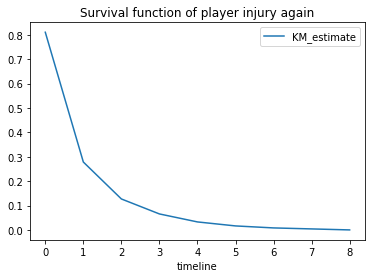

In [79]:
kmf.survival_function_.plot()
plt.title('Survival function of player injury again');

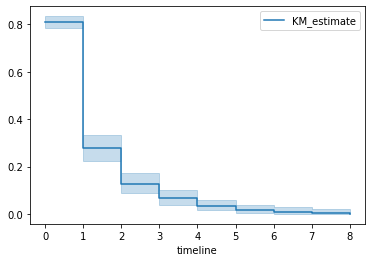

In [80]:
kmf.plot()

In [81]:
kmf.median_survival_time_

1.0

### Check survival function separate in position (main 4 position only).

In [82]:
eiei['role'].unique()

array(['Defender - Left-Back', 'Forward - Right Winger',
       'Forward - Centre-Forward', 'Midfielder - Central Midfield',
       'Midfielder - Attacking Midfield', 'Defender - Centre-Back',
       'Goalkeeper', 'Midfielder - Defensive Midfield',
       'Defender - Right-Back', 'Midfielder - Right Midfield',
       'Forward - Left Winger', 'Forward - Second Striker',
       'Midfielder - Left Midfield'], dtype=object)

In [83]:
eiei[['main_role','sub_role']] = eiei.role.str.split(" - ",expand=True,)
eiei['main_role'].unique()

C:\Users\Nattawut\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array(['Defender', 'Forward', 'Midfielder', 'Goalkeeper'], dtype=object)

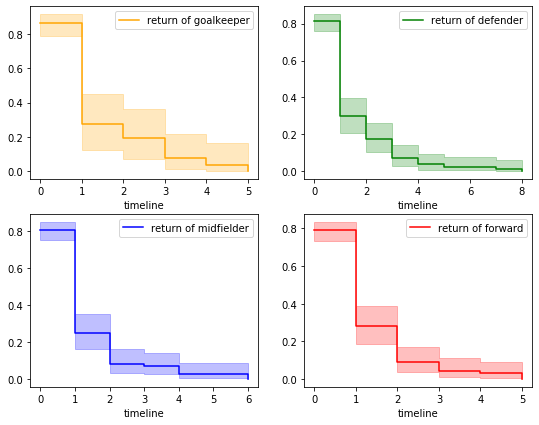

In [84]:
fig = plt.figure(figsize=(9, 7))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

goal = (eiei["main_role"] == "Goalkeeper")
defend = (eiei["main_role"] == "Defender")
midfield = (eiei["main_role"] == "Midfielder")
forward = (eiei["main_role"] == "Forward")

kmf.fit(T[goal], event_observed=E[goal], label="return of goalkeeper")
kmf.plot(ax=ax1,color='orange')
kmf.fit(T[defend], event_observed=E[defend], label="return of defender")
kmf.plot(ax=ax2,color='green')
kmf.fit(T[midfield], event_observed=E[midfield], label="return of midfielder")
kmf.plot(ax=ax3,color='blue')
kmf.fit(T[forward], event_observed=E[forward], label="return of forward")
kmf.plot(ax=ax4,color='red')


### Check survival function separate from foot that them use.

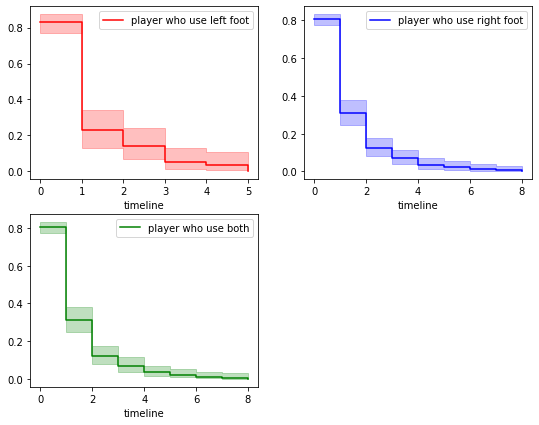

In [85]:
fig = plt.figure(figsize=(9, 7))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

L = (eiei["foot"] == "left")
R = (eiei["foot"] == "right")
B = (eiei["foot"] == "both")
kmf.fit(T[L], event_observed=E[L], label="player who use left foot")
kmf.plot(ax=ax1,color='red')
kmf.fit(T[R], event_observed=E[R], label="player who use right foot")
kmf.plot(ax=ax2,color='blue')
kmf.fit(T[R], event_observed=E[R], label="player who use both")
kmf.plot(ax=ax3,color='green')


## Prepare data to fit with Cox proportional hazard model by cleaning and separate some data i want to use to interval scale

In [131]:
cox_dataset = eiei.drop(columns=['name','transaction_injurie','season_x',\
                                 'maxinjurie','id','club','club_value','birth'\
                                 ,'country','role','transfers','injurie_y','season_y','type','sub_role'])
cox_dataset = cox_dataset[cox_dataset != '\nEURODATA SPORT ']
cox_dataset = cox_dataset[cox_dataset != '\n Real Sociedad ']
cox_dataset['foot'] = cox_dataset['foot'].dropna()
cox_dataset['days'] = cox_dataset['days'].astype('int64')
cox_dataset.age = cox_dataset.age.replace([16,17,18,19,20], '16-20')
cox_dataset.age = cox_dataset.age.replace([21,22,23,24,25], '21-25')
cox_dataset.age = cox_dataset.age.replace([26,27,28,29,30], '26-30')
cox_dataset.age = cox_dataset.age.replace([31,32,33,34,35,36,37], 'more than 31')
cox_dataset.weight = cox_dataset.weight.replace([58,59,60,61,62,63,64,65,66,67,68,69,70], '58-70')
cox_dataset.weight = cox_dataset.weight.replace([71,72,73,74,75,76,77,78,79,80], '71-80')
cox_dataset.weight = cox_dataset.weight.replace([81,82,83,84,85,86,87,88,89,90], '81-90')
cox_dataset.weight = cox_dataset.weight.replace([91,92,93,94,95,96,97,98], '91-98')
cat_columns = cox_dataset.select_dtypes('object').columns
cox_dataset_cat = pd.get_dummies(cox_dataset[cat_columns],drop_first = True)
num_columns = list(set(cox_dataset.columns) - set(cat_columns))
cox_dataset_prep = pd.concat([cox_dataset[num_columns], cox_dataset_cat],axis=1)
cox_dataset[cox_dataset.weight == '81-90']

C:\Users\Nattawut\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Next1,weight,height,foot,days,age,year_to_comback,main_role
126,0,81-90,190,right,45,26-30,0,Defender
128,1,81-90,190,right,7,more than 31,1,Defender
213,0,81-90,193,right,16,16-20,0,Goalkeeper
214,0,81-90,194,right,101,16-20,0,Forward
280,1,81-90,192,right,16,26-30,1,Goalkeeper
...,...,...,...,...,...,...,...,...
11954,1,81-90,196,right,22,21-25,0,Goalkeeper
11962,0,81-90,197,right,13,21-25,0,Forward
12040,0,81-90,196,right,916,26-30,0,Goalkeeper
12113,1,81-90,193,right,3,21-25,0,Forward


## Fit cox proportional hazard model from CoxPHFitter from lifelines library.

In [126]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(cox_dataset_prep, duration_col='year_to_comback', event_col='Next1', show_progress=True)

cph.print_summary()

Iteration 1: norm_delta = 0.44867, step_size = 0.9000, log_lik = -2014.92351, newton_decrement = 24.44482, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.35819, step_size = 0.9000, log_lik = -1986.83720, newton_decrement = 7.29416, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.17519, step_size = 0.9000, log_lik = -1978.69944, newton_decrement = 1.05383, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.02193, step_size = 1.0000, log_lik = -1977.57257, newton_decrement = 0.01333, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00027, step_size = 1.0000, log_lik = -1977.55913, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1977.55913, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 915 total observations, 544 right-censored observations>
             duration col = 'year_to_comback'
                event col = 'Next1'
      baseline estimation = breslow
   number of observations = 915
number of events observed = 371
   partial log-likelihood = -1977.56
         time fit was run = 2020-11-23 06:47:33 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
days                  -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
height                 0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
weight_71-80          -0.22       0.80       0.15            -0.51             0.07                 0.60                 1.07
weight_81-90          -0.10       0.90       0.20            -0.49             0.29                 0.61                 1.34
weight_91-98          -0.97       0.38       0.54            -2.03             0.09                 0.13                 1.10
foot_left             -0.10       0.90       0.25            -0.59             0.38                 0.55                 1.47
foot_right            -0.13       0.88       0.23            -0.58             0.32                 0.56                 1.37
age_21-25             -0.01       0.99       0.19            -0.38             0.37                 0.68                 1.44
age_26-30             -0.06       0.94       0.20            -0.45             0.33                 0.64                 1.39
age_more than 31      -0.16       0.85       0.26            -0.66             0.34                 0.51                 1.40
main_role_Forward      0.14       1.16       0.14            -0.13             0.42                 0.88                 1.52
main_role_Goalkeeper  -0.09       0.91       0.20            -0.49             0.30                 0.61                 1.35
main_role_Midfielder   0.14       1.14       0.14            -0.14             0.41                 0.87                 1.51

                         z      p   -log2(p)
covariate                                   
days                 -6.29 <0.005      31.60
height                1.40   0.16       2.64
weight_71-80         -1.51   0.13       2.92
weight_81-90         -0.51   0.61       0.71
weight_91-98         -1.79   0.07       3.77
foot_left            -0.42   0.68       0.56
foot_right           -0.58   0.56       0.83
age_21-25            -0.03   0.97       0.04
age_26-30            -0.30   0.76       0.39
age_more than 31     -0.64   0.52       0.95
main_role_Forward     1.03   0.30       1.73
main_role_Goalkeeper -0.46   0.64       0.64
main_role_Midfielder  0.95   0.34       1.55
---
Concordance = 0.73
Partial AIC = 3981.12
log-likelihood ratio test = 74.73 on 13 df
-log2(p) of ll-ratio test = 33.12

In [ ]:
## Plot to check

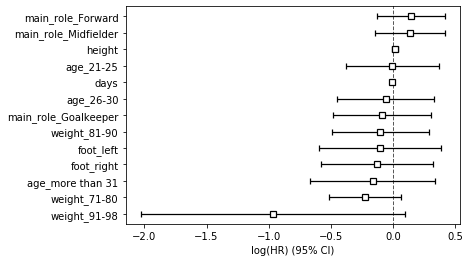

In [127]:
cph.plot()

In [122]:
X = cox_dataset_prep
cph.predict_survival_function(X[0:1])

,1
0.0,0.901722
1.0,0.674781
2.0,0.524761
3.0,0.415590
4.0,0.324742
5.0,0.247886
6.0,0.190485
7.0,0.140812
8.0,0.051235
